#### 基于机器学习的HPC抗压强度预测

In [77]:
# 本地虚拟环境：base(Python3.7.4)

#### 数据源

In [78]:
# 数据来源
# https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength
# https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

<!-- <h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>🔑 Key Components:</b></h1> -->

➡️ **Cement (kg/m^3):**
    水泥：The amount of cement in the concrete mixture.
    
➡️ **Blast Furnace Slag (kg/m^3):** 
    高炉矿渣：The amount of blast furnace slag in the concrete mixture.
    
➡️ **Fly Ash (kg/m^3):** 
    粉煤灰：The amount of fly ash in the concrete mixture.
    
➡️ **Water (kg/m^3):** 
    水：The amount of water in the concrete mixture.
    
➡️ **Superplasticizer (kg/m^3):**
    减水剂：The amount of superplasticizer in the concrete mixture.
    
➡️ **Coarse Aggregate (kg/m^3):** 
    粗骨料：The amount of coarse aggregate in the concrete mixture.
    
➡️ **Fine Aggregate (kg/m^3):** 
    细骨料：The amount of fine aggregate in the concrete mixture.
    
➡️ **Age (days):** 
    养护期：The curing age of the concrete (in days).
    
➡️ **Compressive Strength (MPa):** 
    抗压强度：The target variable representing the concrete's compressive strength.

#### 导入必要的包

In [79]:
# Import necessary imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from mlxtend.plotting import heatmap
from IPython.display import Image
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

config = {'font.family': 'serif', 'font.serif': ['Times New Roman']}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False

In [80]:
df = pd.read_csv('./Dataset/Concrete Compressive Strength.csv')
df.shape

(1030, 9)

In [81]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### 数据清洗与预处理

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### 缺失值检查

In [84]:
# 结论是没有缺失值.
df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

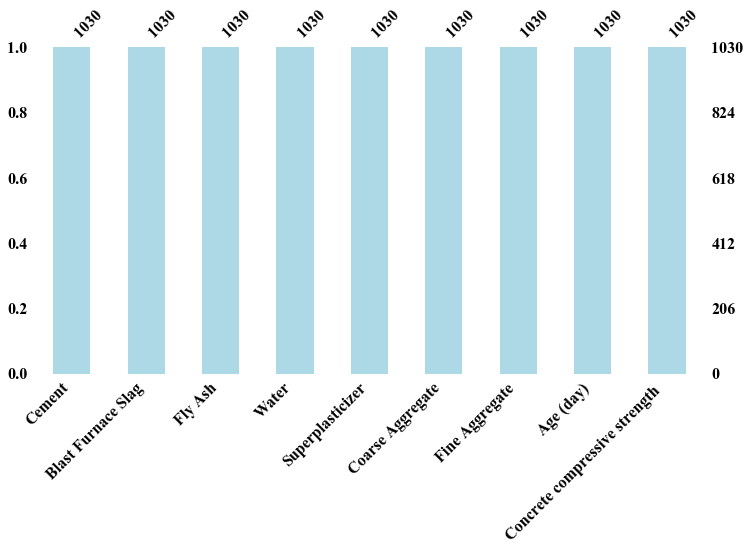

In [85]:
# 使用missingno记性缺失值统计可视化.
msno.bar(df, color = "lightblue", figsize=(12, 6))
plt.show()

##### 异常值检测

In [86]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


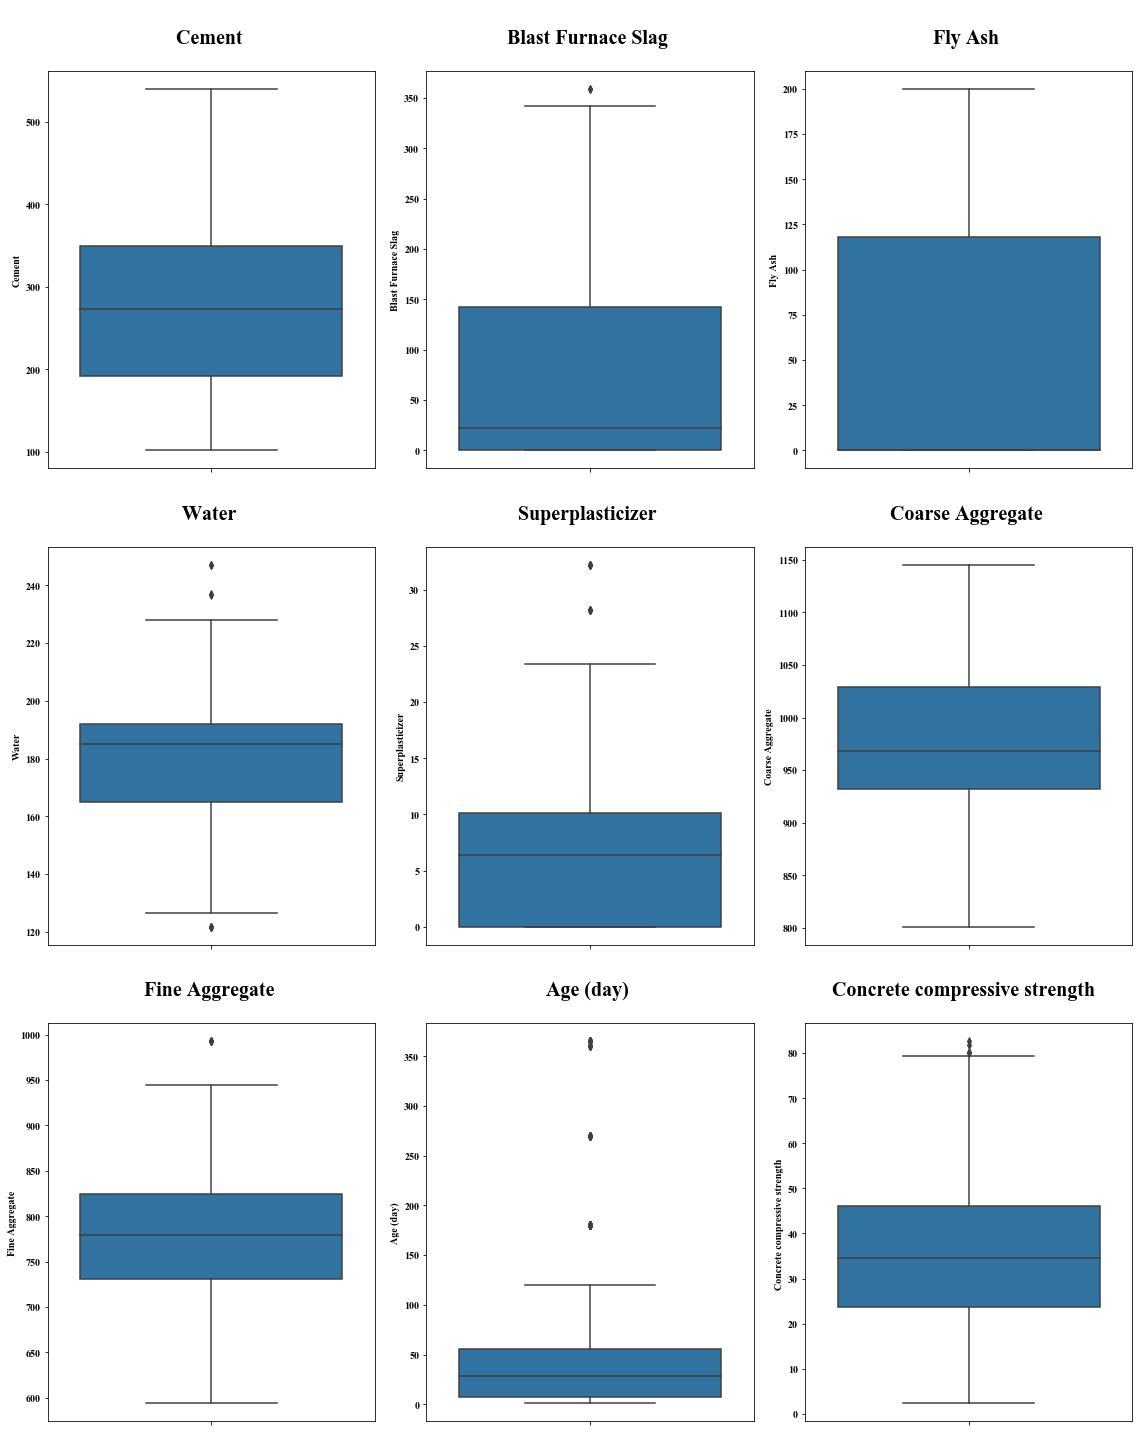

In [87]:
# 经典的箱线图.
cols = df.columns

plt.figure(figsize = (16, 20))
plotnumber = 1
for i in range(0, len(cols)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data = df, y = cols[i],  ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

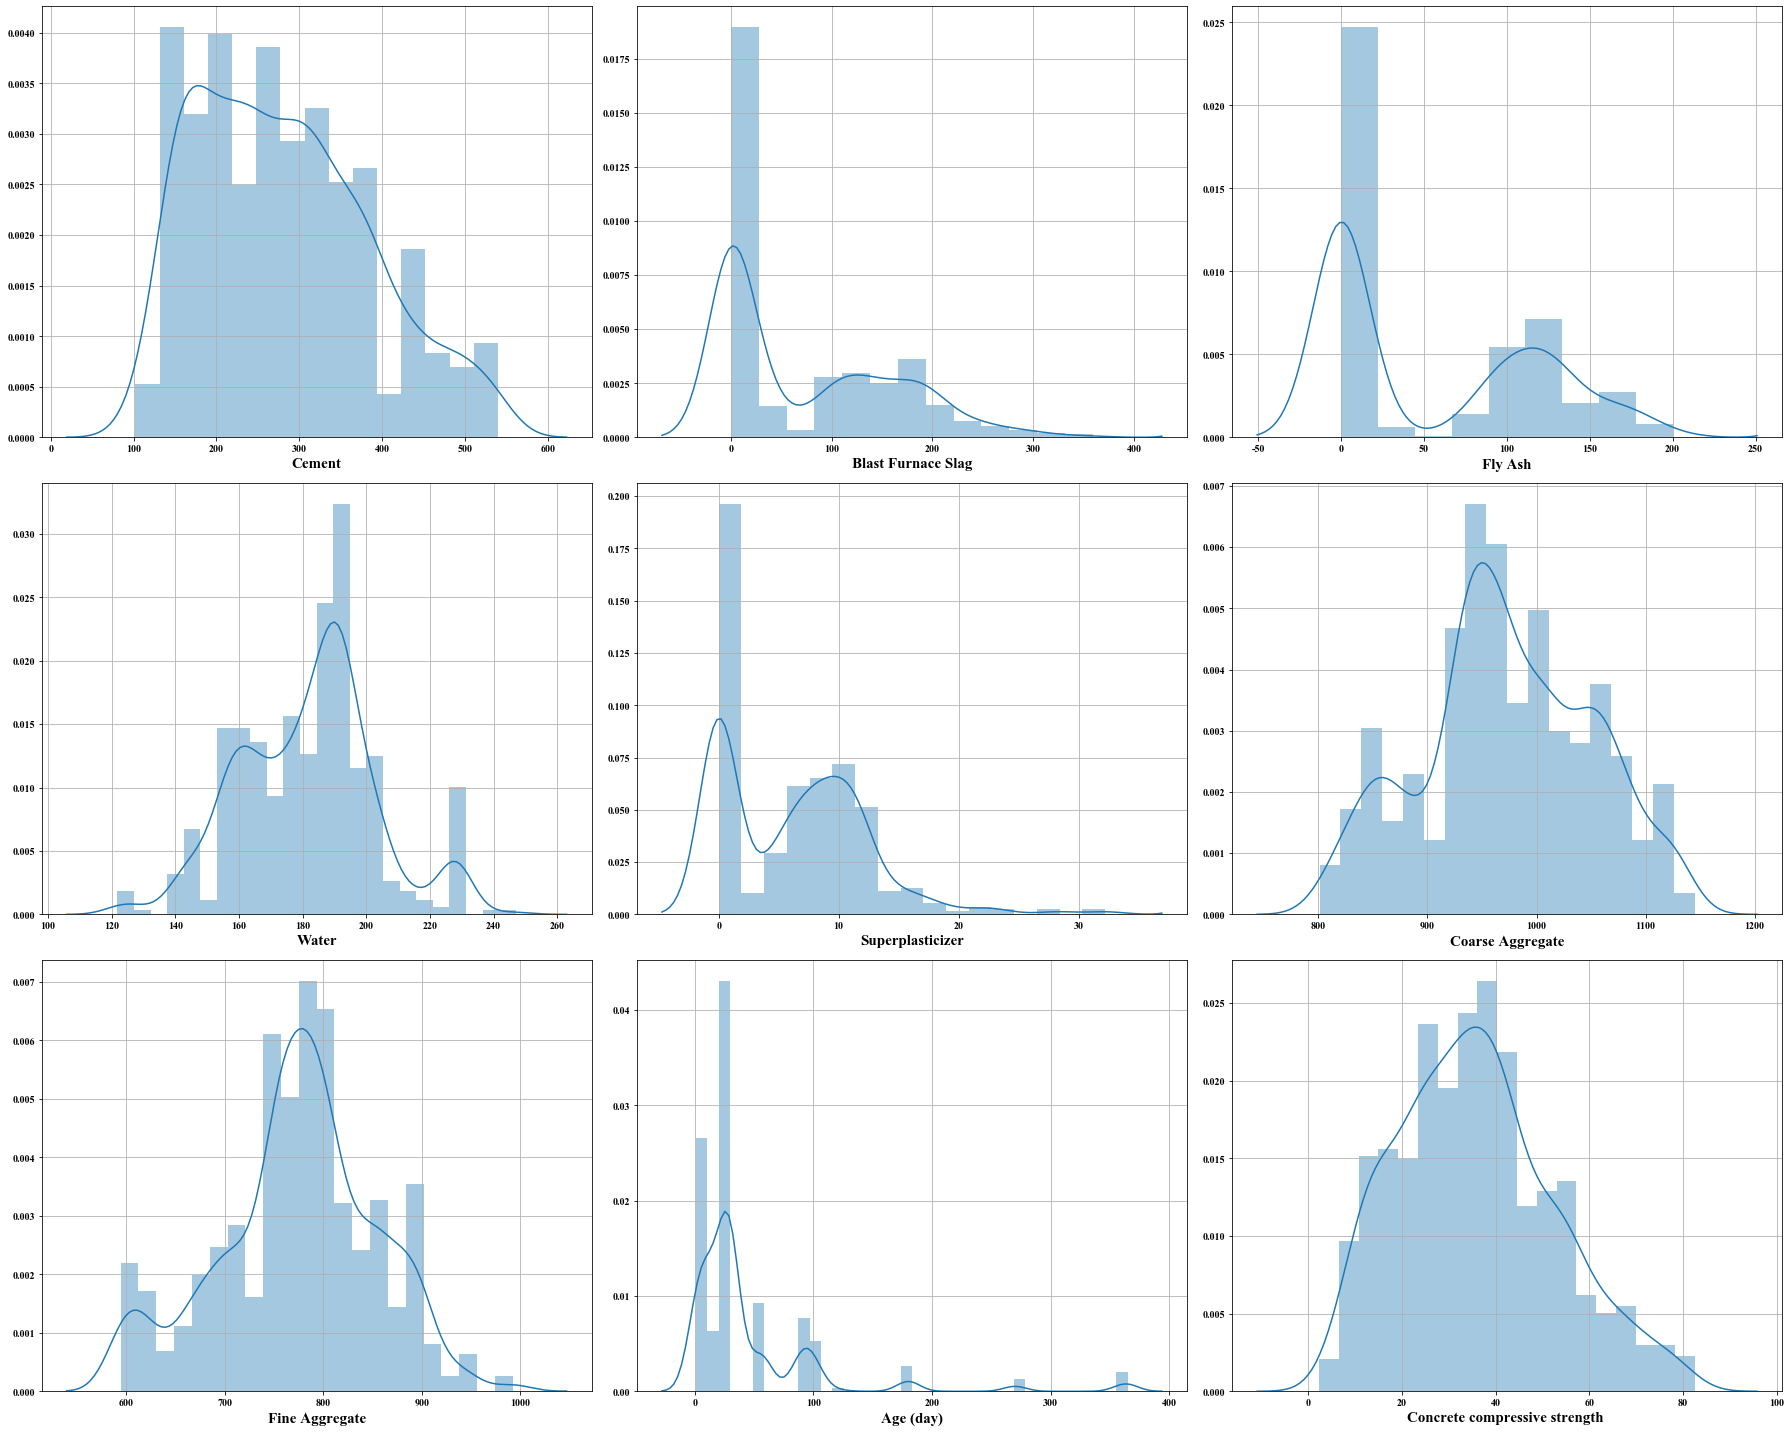

In [88]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.grid(True)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

可以看出，<strong>water</strong>, <strong>Superplasticizer</strong> and <strong>Age</strong>这些特征取值中存在异常值.

#### 探索性数据分析(EDA)

##### 相关性分析

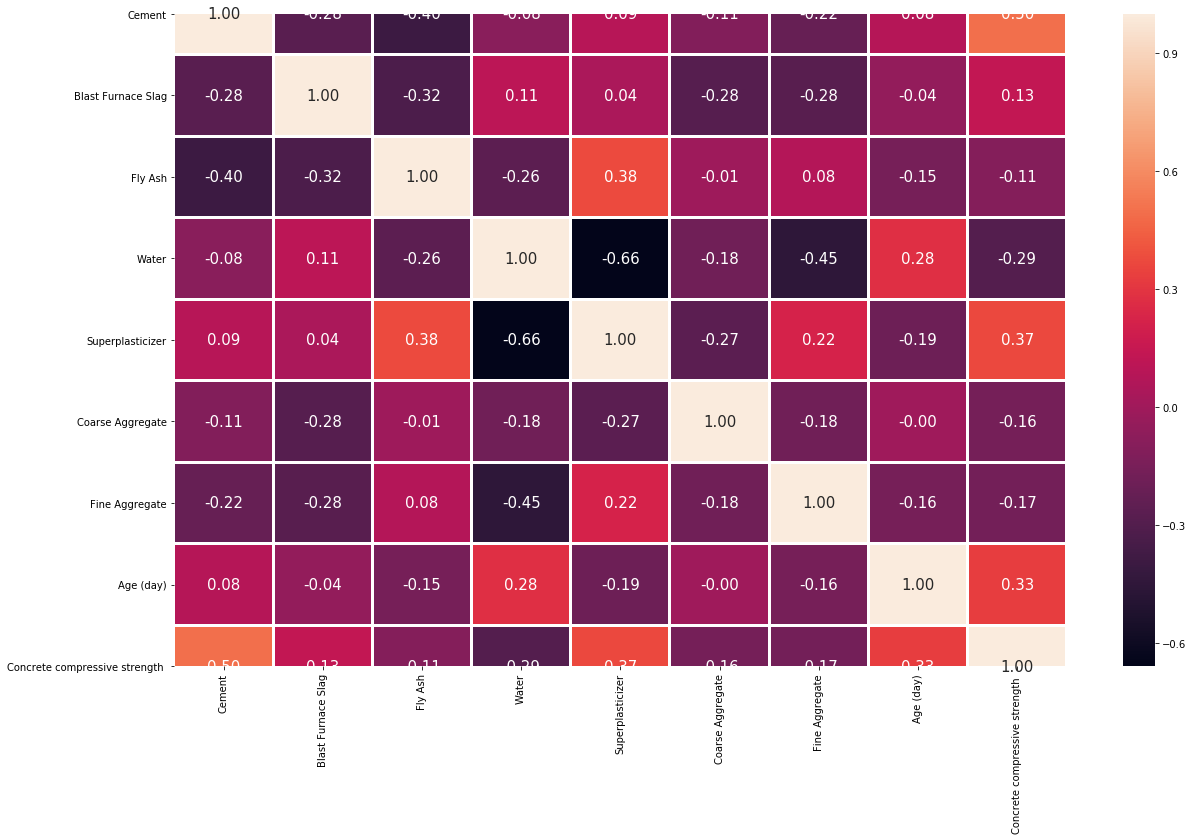

In [89]:
# note: 因为matplotlib 3.1.1的bug, 下图显示不全.
# 解决方法：参见github issur--https://github.com/matplotlib/matplotlib/issues/14675
Image(filename="./Appendix-files/显示不全.png", width=450)

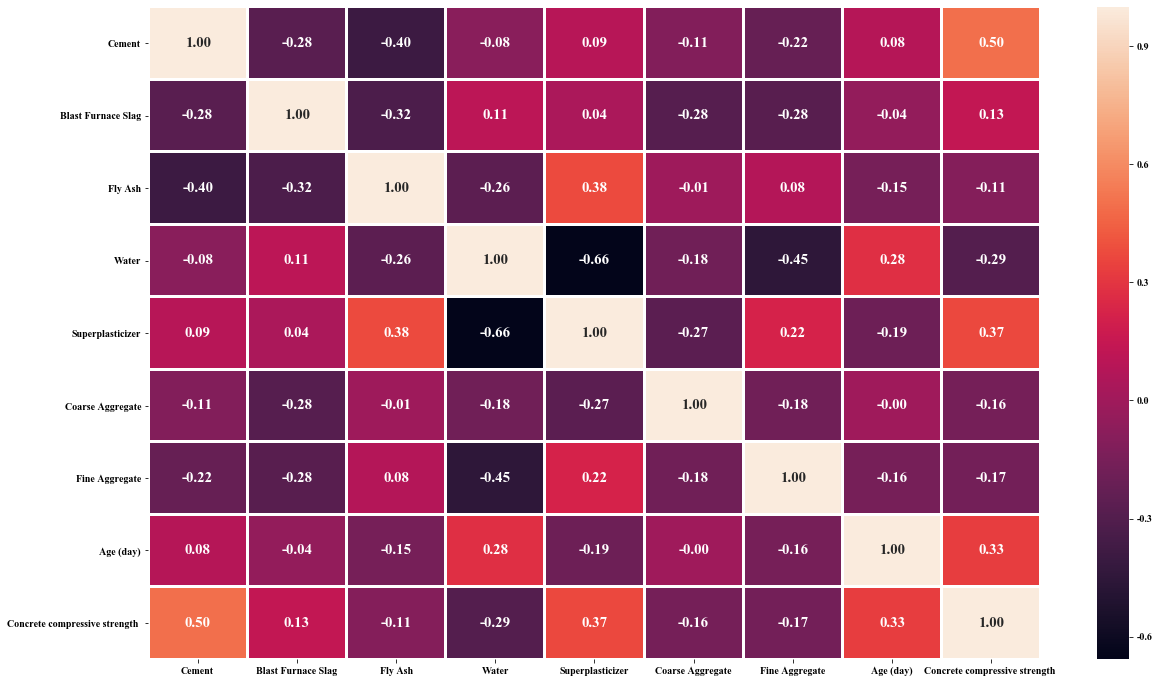

In [90]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()

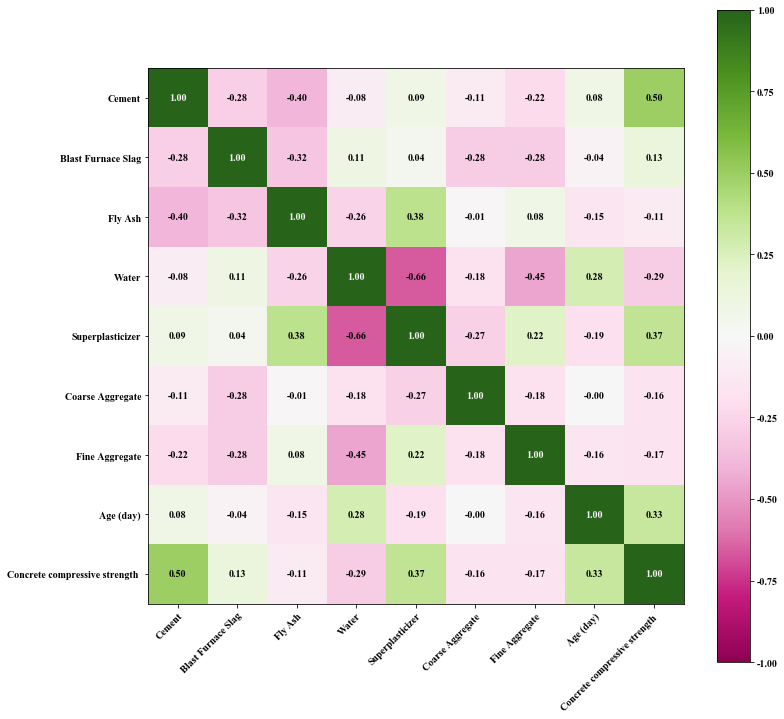

In [91]:
corrmat = np.corrcoef(df.values.T)
fig, ax = heatmap(corrmat, column_names=df.columns, row_names=df.columns,
                  cmap=cm.get_cmap("PiYG"), column_name_rotation=45, figsize=(12, 12))

for im in ax.get_images():
    im.set_clim(-1, 1)
plt.show()

可以看出：
* **水泥含量与抗压强度**：呈现出较高的正相关，相关系数为0.50. 说明在一定范围内，随着水泥含量的增长，抗压强度也随之增长；
* **水含量与减水剂含量**：呈现出较高的负相关，相关系数为-0.66. 表明，使用的减水剂越多，所需的水就越少。减水剂用于提高混凝土的可施工性，允许在不降低流动性的情况下减少水的含量；
* **粉煤灰与减水剂含量**：具有0.38的相关性，属于中等程度的正相关，说明粉煤灰和减水剂的用量往往呈一起增加的趋势。粉煤灰可以改善可施工性并减少水分含量，这可能是为什么它与减水剂一起使用的原因；
* **细骨料和水含量**：相关性为-0.45，这说明细骨料的含量增加可能伴随着水含量的降低；

##### 散点图矩阵

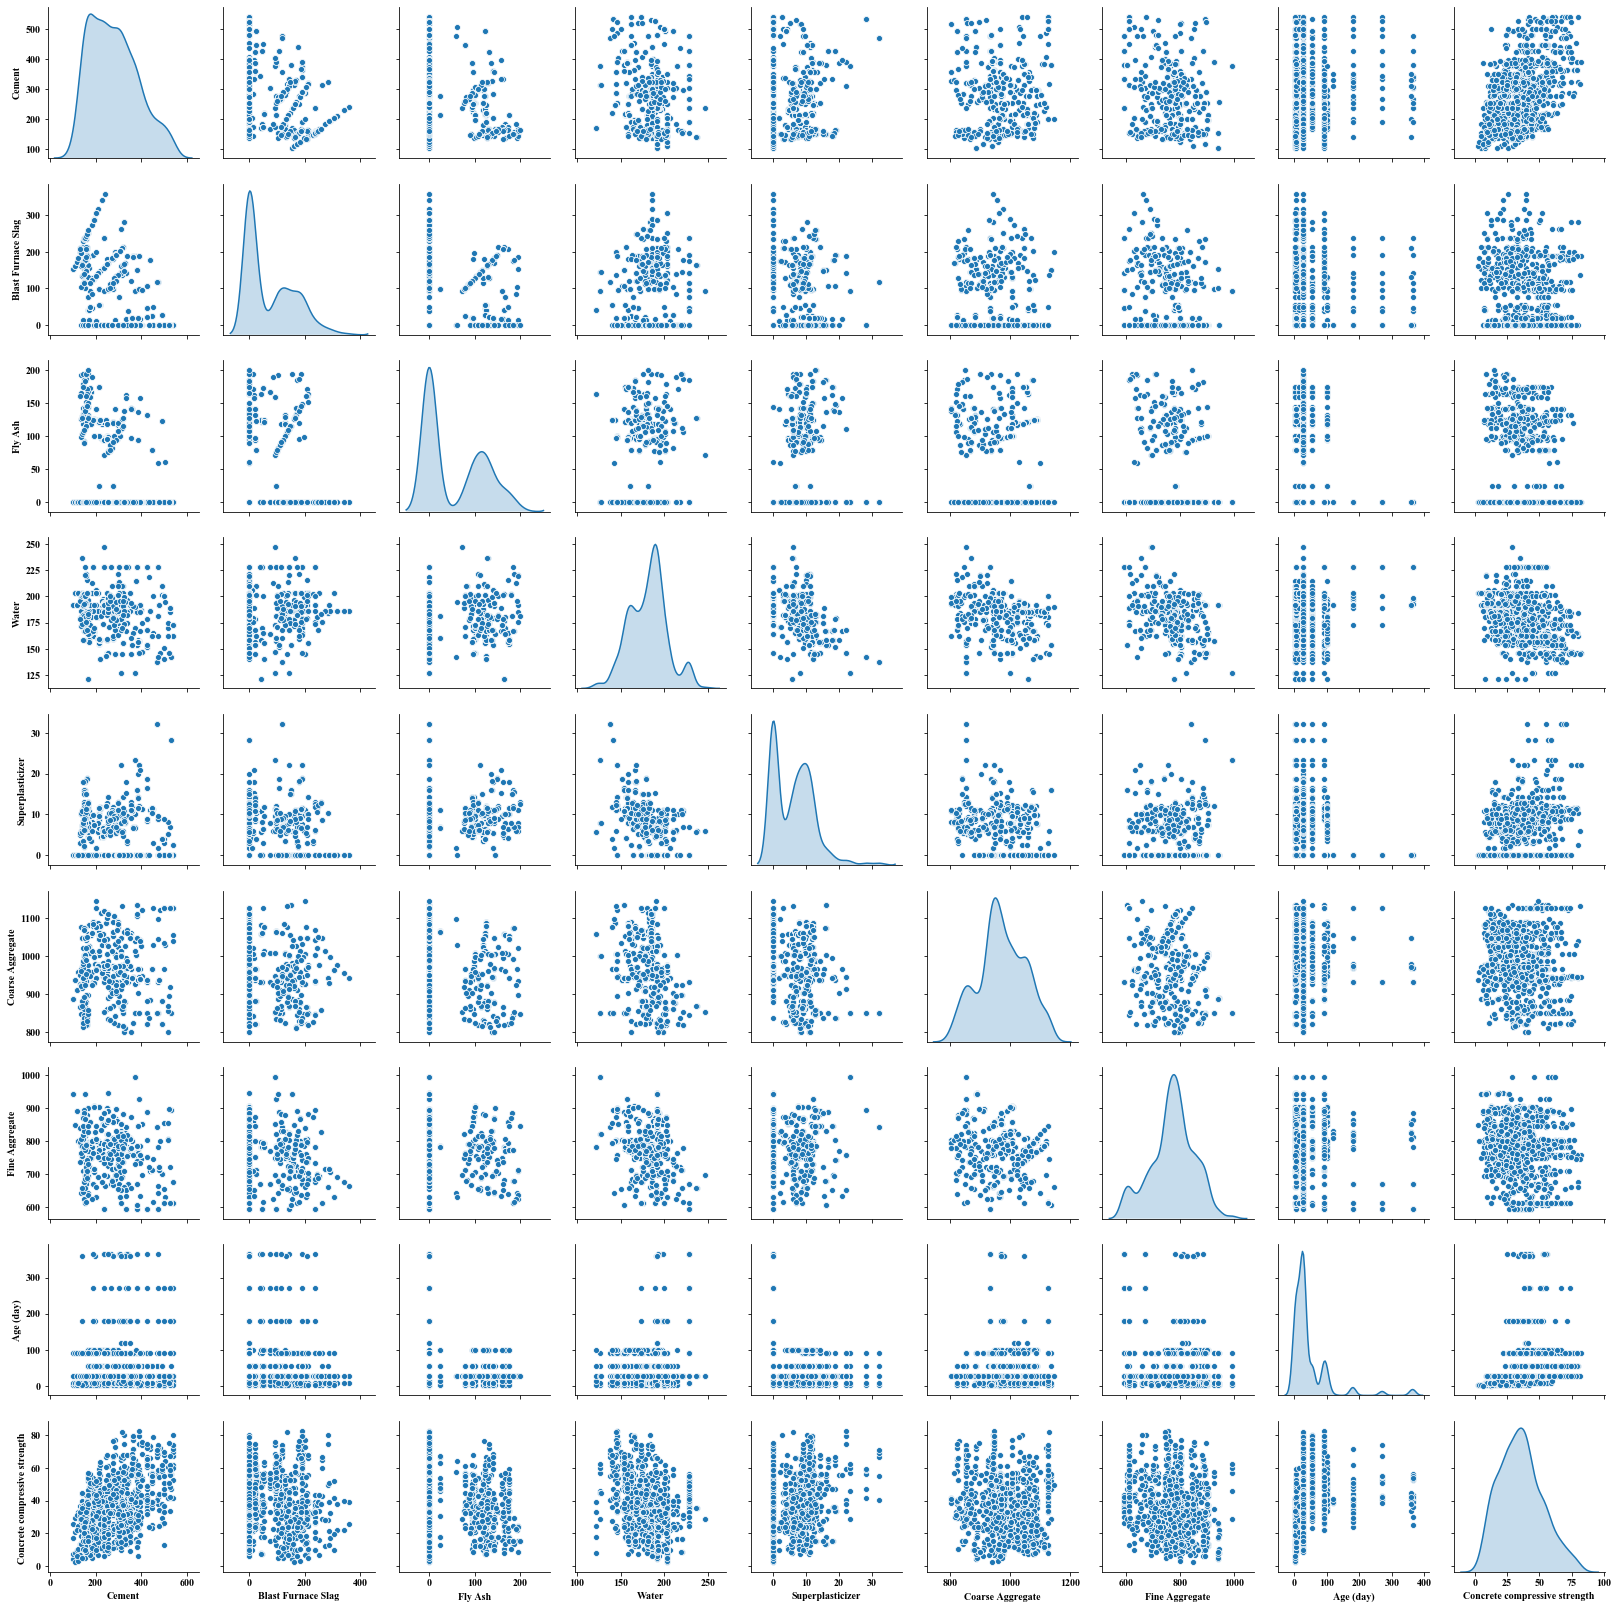

<Figure size 432x288 with 0 Axes>

In [92]:
# Pair Plot.
sns.pairplot(df, diag_kind='kde')
plt.show()
plt.savefig('./Appendix-files/pairplot.png')

**数据分布**：
    <li>对角线上的直方图显示了单个变量的分布 </li>
    <li>炉渣和粉煤灰的分布呈轻微偏态(skewed)，说明取值较小的特征值较为集中，并存在一些较高的异常值。</li>
    <li>水、减水剂显示出近乎正态或均匀的分布。</li>
    <li>混凝土抗压强度呈正态分布。</li>

**数据相关性**：
    <li>对角线外的散点图显示了成对变量之间的关系。</li>
    <li>例如水泥与混凝土抗压强度之间的关系，水泥增加似乎与更高的抗压强度相关。</li>
    <li>养护期与抗压强度之间显示出一种非线性模式，抗压强度随养护期的增加而增加，直到某一点后趋于平稳，这与混凝土的养护过程是一致的。</li>
    <li>水与减水剂之间的负相关关系也比较明显，说明减水剂在降低水分含量同时保持可操作性的有效性。</li>
    <li>一些变量之间没有明显的模式或关系，例如粗骨料与其他许多成分之间的关系，表明缺乏相关性。</li>

**数据密度**：
    <li>散点图中点的密度各不相同，有些区域的点密度更高。这表明数据集中某些配料比例的出现较为频繁。</li>

#### 特征工程

##### 区分特征列与标签列

In [93]:
# distinguish feature and label.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [94]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

##### 对数变换

In [95]:
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [96]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.816392
Fly Ash               5.641045
Water                 0.014066
Superplasticizer      1.333888
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.233057
dtype: float64

##### 查看异常值

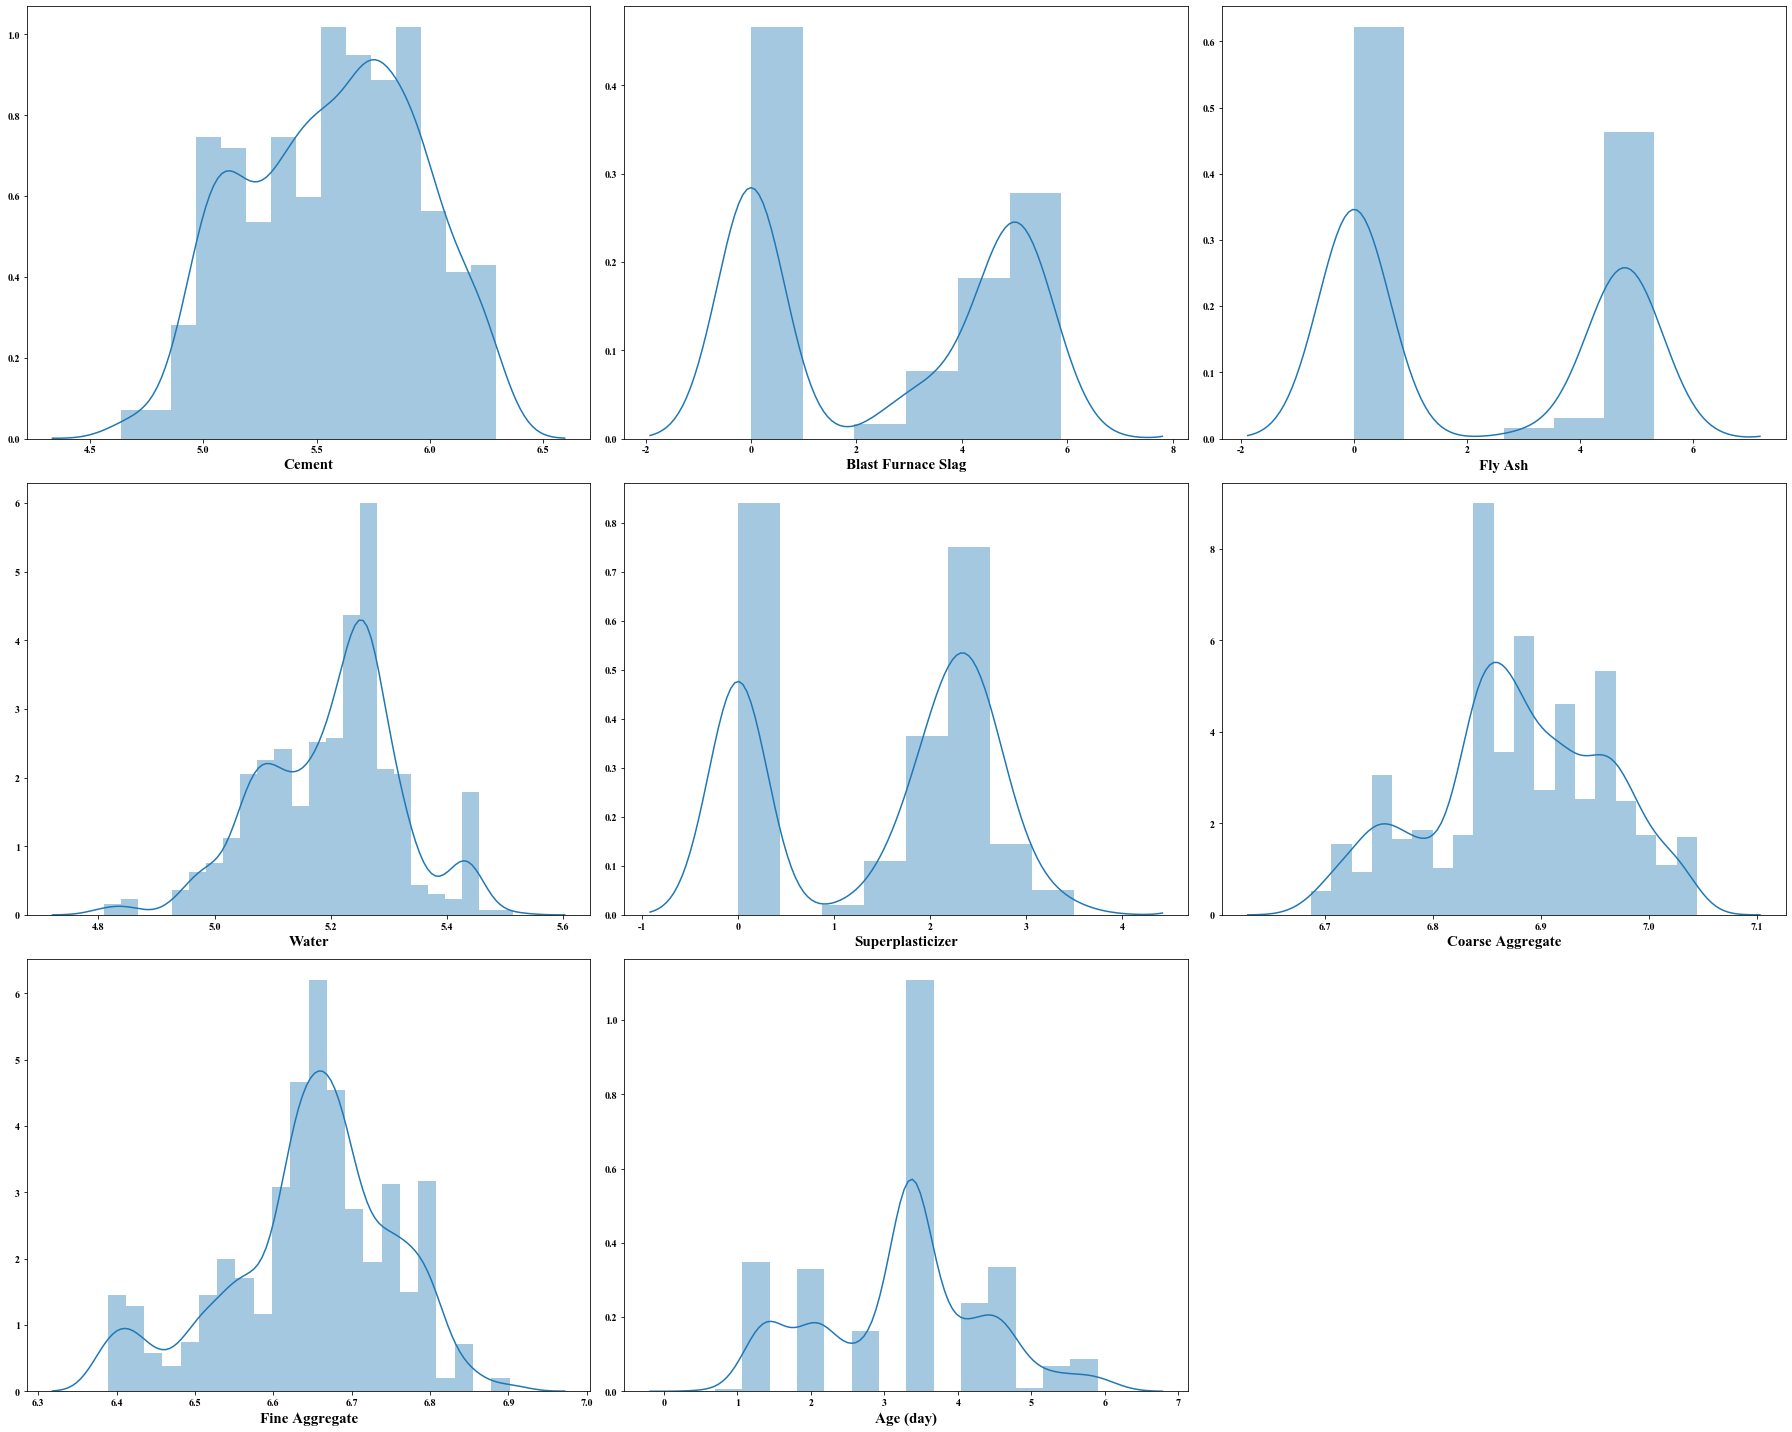

In [97]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

可以看出数据分布的变化，更趋近于正态.


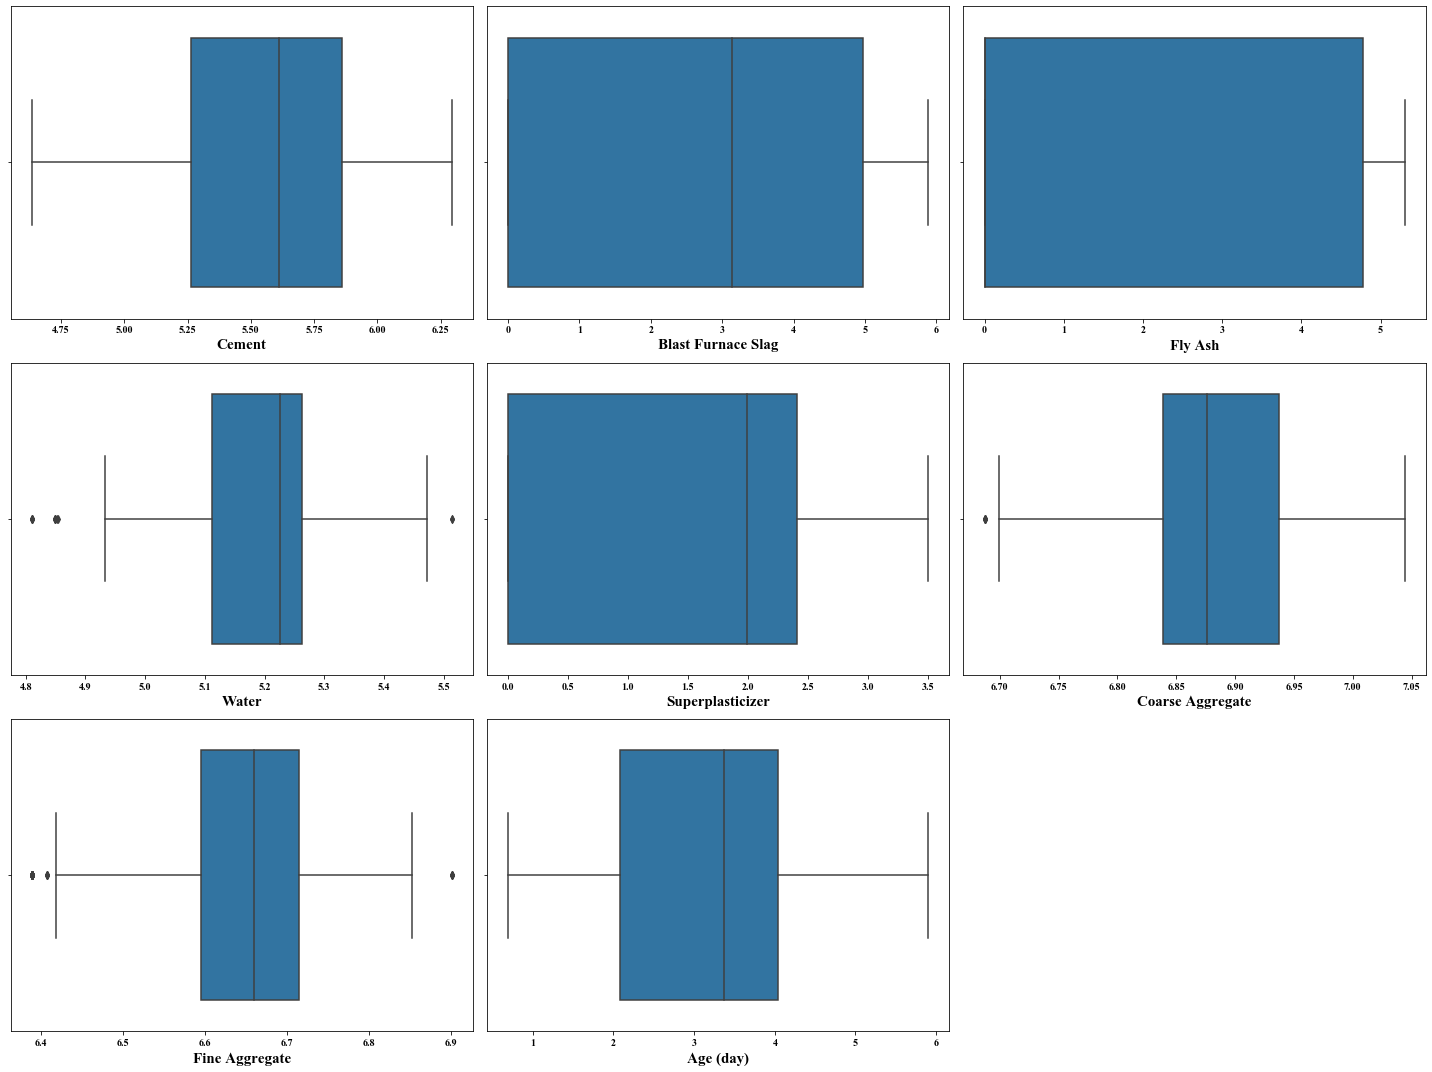

In [98]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

异常值的情况也得到了缓解.


##### 训练集与测试集划分

In [99]:
# splitting data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [100]:
# 特征标准化.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

#### 模型构建

##### 线性回归

In [101]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [102]:
"""
The coefficient of determination R^2 is defined as (1 - \frac{u}{v}), 
where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
"""
lr.score(X_train, y_train)

0.8078559550825178

In [103]:
lr.score(X_test, y_test)

0.7774969997295804

##### 套索回归

In [104]:
from sklearn.linear_model import Lasso, LassoCV

In [105]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [106]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002628251699674941)

In [107]:
lasso.score(X_train, y_train)

0.8078556008754955

In [108]:
lasso.score(X_test, y_test)

0.7775670313359482

##### 决策树

In [109]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
dtr.score(X_train, y_train)

0.9975463893242157

In [111]:
dtr.score(X_test, y_test)

0.8049401503471414

In [112]:
# Hyper Parameter Tuning for Decision Tree Regressor.
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [113]:
# best parameters and best score.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.8347401740428995


In [114]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [115]:
dtr.score(X_train, y_train)

0.9652913484766079

In [116]:
dtr.score(X_test, y_test)

0.7055252845114096

##### 随机森林

In [117]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
rfr.score(X_train, y_train)

0.9871886378452573

In [119]:
rfr.score(X_test, y_test)

0.8971581617874603

##### AdaBoost

In [120]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'))

In [121]:
ada.score(X_train, y_train)

0.9710694121459368

In [122]:
ada.score(X_test, y_test)

0.8677581984023134

In [123]:
# hyper parameter tuning.

grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                              max_depth=10,
                                                                              splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [124]:
# best parameters and best score.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.9043199208277652


In [125]:
ada = AdaBoostRegressor(base_estimator = dtr, learning_rate = 0.5, loss = 'square', n_estimators = 50)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'),
                  learning_rate=0.5, loss='square')

In [126]:
ada.score(X_train, y_train)

0.9790652804457722

In [127]:
ada.score(X_test, y_test)

0.8858726852791019

##### 梯度提升回归

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [129]:
gbr.score(X_train, y_train)

0.9492562829422565

In [130]:
gbr.score(X_test, y_test)

0.8934201375677631

In [131]:
# hyper parameter tuning of gradient boost regressor.

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [132]:
# best parameters and best score.

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'ls', 'n_estimators': 200}
0.9245601144195448


In [133]:
gbr = GradientBoostingRegressor(learning_rate = 0.5, loss = 'huber', n_estimators = 200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, loss='huber', n_estimators=200)

In [134]:
gbr.score(X_train, y_train)

0.9889943127692671

In [135]:
gbr.score(X_test, y_test)

0.9318325012596282

##### XGBoost

In [136]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 10, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [137]:
xgb.score(X_train, y_train)

0.9975376673314307

In [138]:
xgb.score(X_test, y_test)

0.9112764925047047

##### CatBoost

In [139]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

Learning rate set to 0.03971
0:	learn: 16.4557744	total: 2.15ms	remaining: 2.15s
1:	learn: 16.1099356	total: 5.54ms	remaining: 2.76s
2:	learn: 15.7755363	total: 7.13ms	remaining: 2.37s
3:	learn: 15.3902530	total: 8.95ms	remaining: 2.23s
4:	learn: 15.0187238	total: 10.7ms	remaining: 2.12s
5:	learn: 14.6710356	total: 12.1ms	remaining: 2.01s
6:	learn: 14.3341523	total: 13.4ms	remaining: 1.9s
7:	learn: 14.0230334	total: 14.8ms	remaining: 1.84s
8:	learn: 13.7431668	total: 16.6ms	remaining: 1.82s
9:	learn: 13.4353710	total: 18ms	remaining: 1.78s
10:	learn: 13.1374950	total: 19.4ms	remaining: 1.75s
11:	learn: 12.8786834	total: 21.8ms	remaining: 1.8s
12:	learn: 12.6034340	total: 23.2ms	remaining: 1.76s
13:	learn: 12.3598901	total: 24.5ms	remaining: 1.73s
14:	learn: 12.0934743	total: 27ms	remaining: 1.77s
15:	learn: 11.8688349	total: 28.6ms	remaining: 1.76s
16:	learn: 11.6345875	total: 30.2ms	remaining: 1.74s
17:	learn: 11.4021176	total: 32.4ms	remaining: 1.77s
18:	learn: 11.1616827	total: 34.1

In [140]:
cat_model.score(X_train, y_train)

0.9888853298098592

In [141]:
cat_model.score(X_test, y_test)

0.9435630638377581

In [142]:
# # hyper parameter tuning of CatBoost.
# param_grid = {
#     'depth': [6, 8, 10],
#     'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
#     'iterations': [100, 200, 500],
#     'l2_leaf_reg': [1, 3, 5]
# }

# grid_search = GridSearchCV(estimator=cat_model,
#                             param_grid=param_grid,
#                             cv=5, 
#                             verbose=2)
# grid_search.fit(X_train, y_train)

In [143]:
# best parameters and best score.

# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [144]:
# 实际上，在上述代码中，完成网格搜索之后，无需通过clf.fit再次手动训练具有最佳参数配置的模型。
# 因为GridSearchCV中具有一个refit参数，如果设置为True(默认),该参数将自动将gs.best_estimator_重新应用到整个训练集.
cat_model = CatBoostRegressor(depth=6, iterations= 500, l2_leaf_reg= 3, learning_rate= 0.1)
cat_model.fit(X_train, y_train)

0:	learn: 15.8157852	total: 2.91ms	remaining: 1.45s
1:	learn: 14.9943797	total: 5.27ms	remaining: 1.31s
2:	learn: 14.2165182	total: 8.02ms	remaining: 1.33s
3:	learn: 13.4004705	total: 10.3ms	remaining: 1.28s
4:	learn: 12.7019511	total: 11.9ms	remaining: 1.18s
5:	learn: 12.0089864	total: 13.4ms	remaining: 1.1s
6:	learn: 11.4087878	total: 15.8ms	remaining: 1.11s
7:	learn: 10.8806148	total: 17.9ms	remaining: 1.1s
8:	learn: 10.4365578	total: 19.3ms	remaining: 1.05s
9:	learn: 9.9779914	total: 20.8ms	remaining: 1.02s
10:	learn: 9.5264134	total: 22.2ms	remaining: 986ms
11:	learn: 9.1819069	total: 23.6ms	remaining: 958ms
12:	learn: 8.8643135	total: 24.8ms	remaining: 928ms
13:	learn: 8.5187470	total: 27.2ms	remaining: 943ms
14:	learn: 8.2195726	total: 28.6ms	remaining: 926ms
15:	learn: 7.9621051	total: 29.8ms	remaining: 902ms
16:	learn: 7.7019182	total: 31.2ms	remaining: 886ms
17:	learn: 7.4581119	total: 32.7ms	remaining: 876ms
18:	learn: 7.2560726	total: 33.8ms	remaining: 856ms
19:	learn: 7.06

In [145]:
cat_model.score(X_train, y_train)

0.9915293516791972

In [146]:
cat_model.score(X_test, y_test)

0.94644297488704

##### 投票法模型融合

In [147]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb), ('CatBoostRegressor', cat_model)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.7, 0.9))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression',
                             LinearRegression(normalize=True)),
                            ('Lasso Regression',
                             Lasso(alpha=0.002628251699674941)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion=...
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=10, max_leaves=0,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
     

In [148]:
vr.score(X_train, y_train)

0.9921937404764264

In [149]:
vr.score(X_test, y_test)

0.9351711937152836

#### 模型评估

In [150]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', 'CatBoost Regressor', "VotingRegressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), cat_model.score(X_test, y_test), vr.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,CatBoost Regressor,0.946443
8,VotingRegressor,0.935171
5,Gradient Boost,0.931833
6,XgBoost,0.911276
3,Random Forest,0.897158
4,Ada Boost,0.885873
1,Lasso Regression,0.777567
0,Linear Regression,0.777497
2,Decision Tree,0.705525


In [151]:
models = models.sort_values(by='Score', ascending=True)

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

In [152]:
fig = px.bar(data_frame=models, x='Score', y='Model', color='Score', 
             title='Models Comparison', text='Score')

fig.update_traces(texttemplate='%{text:.3f}', textposition='auto')

fig.show()

可以看出，CatBoost模型性能相对最优.

#### 模型持久化

In [154]:
%pwd

'd:\\github_&_vscode\\Work-Project-Collection\\ML-利用机器学习预测混凝土抗压强度'

In [156]:
import pickle
import os


# 在当前项目中创建用以保存模型文件的目录.
os.makedirs('./model', exist_ok=True)

# 模型序列化保存导出.
with open('./model/cat_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)
    print('模型保存成功')

模型保存成功


#### 扩展应用

In [153]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

**目标**：探索抗压强度随养护时间的变化规律

https://nbviewer.org/github/kfs196/SimpleMLDemo-Concrete/blob/main/FinalReport2.ipynb

